In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
import gc
import numpy as np
import ast

In [42]:
# # df1 = pd.read_csv("c:\\data\\e-commerce\\2019-Oct.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
# df = pd.read_csv("c:\\data\\e-commerce\\2019-Nov.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
# # df = pd.concat([df1, df2])
# # del df1, df2
# # gc.collect()
# df.head(2)

In [43]:
# display(df['brand'].nunique())
# display(df['category_code'].nunique())

In [44]:
# display(df['category_code'].isnull().sum())
# display(len(df))

In [45]:
# df['category_code'] = df['category_code'].astype('category')
# df['category_code'] = df['category_code'].cat.add_categories('unknown.')
# df['category_code'].fillna('unknown.', inplace=True)

# df['general_category'] = df['category_code'].apply(lambda x: x.split('.')[0])
# display(df.head(2))

In [46]:
# df['user_session'] = df['user_session'].astype('category').cat.codes
# df.head()

In [47]:
# # datetime 처리
# df['event_time'] = pd.to_datetime(df['event_time'])
# df['date'] = df['event_time'].dt.date

# # 사용자별, 시간순 정렬
# df = df.sort_values(['user_id', 'event_time'])

# # 구매 발생 플래그
# df['is_purchase'] = df['event_type'] == 'purchase'

# # 하루 단위 기준 세션 초기화
# df['daily_session'] = df['user_id'].astype(str) + '_' + df['date'].astype(str)

# # 구매 발생 시 세션 쪼개기: 구매 이후는 새로운 세션으로
# def split_on_purchase(group):
#     session_id = []
#     counter = 0
#     for is_p in group['is_purchase']:
#         session_id.append(counter)
#         if is_p:
#             counter += 1
#     return session_id

# # 사용자 + 날짜별로 쪼개서 세션 나누기
# df['session_split_id'] = df.groupby(['user_id', 'date']).apply(split_on_purchase).explode().values

# df['custom_session'] = (
#     df['user_id'].astype(str) + '_' +
#     df['date'].astype(str) + '_' +
#     df['session_split_id'].astype(str)
# )
# df.head(2)

In [48]:
# df1.to_csv("c:\\data\\e-commerce\\custom_session.csv", index=False) # event_time, event_type, product_id, category_code, brand, price, user_id, user_session, general_category, date, is_purchase, daily_session, session_split_id, custom_session
# df2.to_csv("c:\\data\\e-commerce\\custom_session_2.csv", index=False)

In [49]:
# df1 = pd.read_csv("c:\\data\\e-commerce\\custom_session.csv", usecols=['event_time', 'event_type', 'product_id', 'category_code', 'brand', 'price', 'user_id', 'general_category', 'custom_session'])
# df2 = pd.read_csv("c:\\data\\e-commerce\\custom_session_sample.csv", usecols=['event_time', 'event_type', 'product_id', 'category_code', 'brand', 'price', 'user_id', 'general_category', 'custom_session'])
# display(df1.head(2))
# display(df2.head(2))

In [50]:
# real_final_custom_session = pd.concat([df1, df2])
# len(real_final_custom_session)
# real_final_custom_session.to_csv("c:\\data\\e-commerce\\real_final_custom_session.csv", index=False)

In [51]:
# custom_session = pd.read_csv("c:\\data\\e-commerce\\custom_session.csv")
# custom_session.head(2)

In [52]:
# buy_sessions = custom_session[custom_session['event_type'] == 'purchase']['custom_session'].unique()

# buy_log = custom_session[custom_session['custom_session'].isin(buy_sessions)]
# not_buy_log = custom_session[~custom_session['custom_session'].isin(buy_sessions)]
# custom_session['buy'] = custom_session['custom_session'].isin(buy_log['custom_session']).astype(int)
# custom_session.head(2)

In [53]:
# custom_session = pd.read_csv("C:\\Users\\User\\Downloads\\custom_session_sample_oct_nov.csv") # sampled 0 + all 1 of Oct N Nov
# custom_session.head(2)

In [54]:
# median_price_category = custom_session.groupby('general_category')['price'].median().to_dict()
# custom_session['relative_price'] = custom_session['price'] / custom_session['general_category'].map(median_price_category)
# custom_session.head(2)

In [55]:
# del median_price_category
# gc.collect()

In [56]:
# custom_session['custom_session'] = custom_session['custom_session'].astype('category').cat.codes
# custom_session.head(2)

In [57]:
# def log_dictionary(df):
#     df = df.sort_values(['user_id', 'event_time'])
#     df['event_time'] = pd.to_datetime(df['event_time'])

#     session_data = []

#     for session, group in df.groupby('custom_session'):
#         group = group.sort_values('event_time')

#         times = group['event_time'].tolist()
#         time_since_start = [(t - times[0]).total_seconds() for t in times]
#         time_since_prev = [0] + [(times[i] - times[i-1]).total_seconds() for i in range(1, len(times))]

#         events = []
#         for _, row in group.iterrows():
#             if row['event_type'] == 'purchase':
#                 continue  # 구매 제외
            
#             events.append({
#                 "event_type": row["event_type"],
#                 "product_id": row["product_id"],
#                 "category_code": row["category_code"] if pd.notna(row["category_code"]) else "unknown.",
#                 "general_category": row["general_category"] if pd.notna(row["general_category"]) else "unknown",
#                 "brand": row["brand"] if pd.notna(row["brand"]) else "unknown",
#                 "price": row["price"],
#                 "relative_price": row["relative_price"],
#                 "time_since_start": time_since_start[len(events)],
#                 "time_since_prev": time_since_prev[len(events)]
#             })

#         session_data.append({
#             "session": session,
#             "event": events,
#             "buy": int(group["buy"].max())
#         })

#     return pd.DataFrame(session_data)

In [58]:
# log_dict = log_dictionary(custom_session) # 80m
# log_dict.to_csv("C:\\Users\\User\\Downloads\\custom_session_sample_oct_nov_log_dict.csv", index=False)

In [59]:

# log_dict = pd.read_csv("C:\\Users\\User\\Downloads\\custom_session_sample_oct_nov_log_dict.csv")
# log_dict["event"] = log_dict["event"].apply(ast.literal_eval)
# log_dict.head(2)

In [60]:
# # pd.set_option("display.max_colwidth", None)
# # pd.set_option("display.max_rows", None)
# # pd.set_option("display.max_columns", None) 

# pd.reset_option("display.max_colwidth")
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

In [61]:
# def category_code(events):
#     for event in events:
#         if event['category_code'] == 'unknown.':
#             event['category_code'] = 'unknown'
#     return events
# log_dict['event'] = log_dict['event'].apply(category_code)

In [62]:
# from sklearn.preprocessing import LabelEncoder
# le_event = LabelEncoder()
# unique_events = ['view', 'cart', 'purchase']
# le_event.fit(unique_events)
# # le_event.fit(custom_session['event_type'].unique())
# le_event.classes_

In [63]:
# del custom_session
# gc.collect()

In [64]:
# def encode_event_type(events):
#     for event in events:
#         event['event_type'] = le_event.transform([event['event_type']])[0]
#     return events

# log_dict['event'] = log_dict['event'].apply(encode_event_type)

In [65]:
# log_dict.head(2)

In [66]:
# df = log_dict
# del log_dict
# gc.collect()

In [67]:
# df.to_csv("C:\\Users\\User\\Downloads\\custom_session_sample_oct_nov_log_dict_encoded.csv", index=False)

In [68]:
# df = pd.read_csv("C:\\Users\\User\\Downloads\\custom_session_sample_oct_nov_log_dict_encoded.csv")
df = pd.read_csv("C:\\Users\\User\\Desktop\\RyuEcommerce\\e-commerce_analysis\\custom_session_sample_oct_nov_log_dict_encoded_sampled.csv")
df.head(2)

,session,event,buy
0,47,"[{'event_type': np.int64(2), 'product_id': 173...",1
1,222,"[{'event_type': np.int64(2), 'product_id': 680...",1


In [69]:
df["event"] = df["event"].apply(eval)

In [70]:
# 전체 파이프라인: 데이터 파싱 -> vocabs -> tf.data -> Transformer 모델 -> 학습
import json
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [71]:
# 1) 파싱
# columns = ['session', 'event', 'buy']
# event 컬럼은 문자열화된 리스트(예: "[{...}, {...}]")
# parse if string
def parse_events(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            try:
                return json.loads(x)
            except Exception:
                return []
    elif isinstance(x, list):
        return x
    else:
        return []

df['events_parsed'] = df['event'].apply(parse_events)

# quick inspect
print("n_sessions:", len(df))
print("example session events:", df['events_parsed'].iloc[0])

n_sessions: 3319576
example session events: [{'event_type': 2, 'product_id': 17301868, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'sheba', 'price': 144.14, 'relative_price': 1.78922542204568, 'time_since_start': 0.0, 'time_since_prev': 0}, {'event_type': 2, 'product_id': 17300771, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'bulgari', 'price': 57.72, 'relative_price': 0.7164846077457795, 'time_since_start': 66.0, 'time_since_prev': 66.0}, {'event_type': 2, 'product_id': 17300789, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'bulgari', 'price': 55.79, 'relative_price': 0.6925273088381331, 'time_since_start': 81.0, 'time_since_prev': 15.0}, {'event_type': 2, 'product_id': 17301041, 'category_code': 'unknown', 'general_category': 'unknown', 'brand': 'shiseido', 'price': 93.5, 'relative_price': 1.160625620655412, 'time_since_start': 134.0, 'time_since_prev': 53.0}]


In [72]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['buy'])

In [73]:
# 2) Extract features per event and build vocabs for categorical fields
cat_fields = ['event_type', 'category_code', 'general_category', 'brand']
num_fields = ['price', 'relative_price', 'time_since_start', 'time_since_prev']

# Flatten to collect uniques
from collections import Counter, defaultdict
counters = {f: Counter() for f in cat_fields}
sess_lengths = []

for ev_list in train_df['events_parsed']: # train_df 기준의 vocab
    sess_lengths.append(len(ev_list))
    for ev in ev_list:
        for f in cat_fields:
            val = ev.get(f, 'unknown')
            # unify missing / weird strings
            if val is None or (isinstance(val, float) and np.isnan(val)):
                val = 'unknown'
            counters[f][str(val)] += 1

# Show top uniques
for f in cat_fields:
    print(f, "unique:", len(counters[f]), "top:", counters[f].most_common(5))

# decide vocab sizes (example)
VOCAB_SIZES = {
    'event_type': None,
    'category_code': 200, 
    'general_category': None,
    'brand': 3000
}

def build_vocab(counter, max_size=None, min_freq=1, add_oov=True):
    items = [k for k, v in counter.items() if v >= min_freq]
    items_sorted = sorted(items, key=lambda x: counter[x], reverse=True)
    if max_size:
        items_sorted = items_sorted[:max_size]
    vocab = {v: i+1 for i, v in enumerate(items_sorted)}  # reserve 0 for PAD
    if add_oov:
        vocab['<OOV>'] = len(vocab) + 1
    return vocab

vocab = {}
for f in cat_fields:
    vocab[f] = build_vocab(counters[f], max_size=VOCAB_SIZES.get(f, None))
    print(f, 'vocab_size:', len(vocab[f]))

event_type unique: 2 top: [('2', 25381921), ('0', 2957419)]
category_code unique: 130 top: [('unknown', 8606962), ('electronics.smartphone', 8236112), ('electronics.video.tv', 890927), ('electronics.audio.headphone', 830001), ('electronics.clocks', 809179)]
general_category unique: 14 top: [('electronics', 11393043), ('unknown', 8606962), ('appliances', 3720935), ('computers', 1487998), ('apparel', 944203)]
brand unique: 4067 top: [('samsung', 4108248), ('unknown', 3480237), ('apple', 3061547), ('xiaomi', 2037508), ('huawei', 700771)]
event_type vocab_size: 3
category_code vocab_size: 131
general_category vocab_size: 15
brand vocab_size: 3001


In [74]:
# session_lengths = [len(ev) for ev in df['events_parsed']]

# plt.hist(session_lengths, bins=50)
# plt.xlabel("Session length")
# plt.ylabel("Number of sessions")
# plt.title("Distribution of session lengths")
# plt.show()

In [75]:
# lengths = np.array(session_lengths)
# print(np.percentile(lengths, [50, 90, 95,97,98,98.5,99, 100]))


In [76]:
# 3) Feature encoding utilities
MAX_SEQ_LEN = 32  # 128 -> 32 | percentile[50, 90, 95, 99, 100] = [  2.  11.  17.  40. 374.] 
def map_cat(value, vocab_map):
    if value is None:
        return vocab_map.get('<OOV>', 1)
    s = str(value)
    if s in vocab_map:
        return vocab_map[s]
    else:
        return vocab_map.get('<OOV>', 1)

# prepare numeric scaler: compute from flattened events
all_nums_train = {f: [] for f in num_fields} # train_df 기준
for ev_list in train_df['events_parsed']: # train_df 기준
    for ev in ev_list:
        for nf in num_fields:
            val = ev.get(nf, 0.0)
            if val is None:
                val = 0.0
            all_nums_train[nf].append(float(val)) # train_df 기준

scalers = {}
for nf in num_fields:
    scaler = StandardScaler()
    vals = np.array(all_nums_train[nf]).reshape(-1, 1) # train_df 기준
    scaler.fit(vals)
    scalers[nf] = scaler

In [77]:
# 4) Convert each session to fixed tensors (padded/truncated)
def session_to_features(ev_list):
    seq_len = min(len(ev_list), MAX_SEQ_LEN)
    cat_indices = {f: np.zeros(MAX_SEQ_LEN, dtype=np.int32) for f in cat_fields}
    num_values = np.zeros((MAX_SEQ_LEN, len(num_fields)), dtype=np.float32)
    mask = np.zeros((MAX_SEQ_LEN,), dtype=np.float32)
    for i in range(seq_len):
        ev = ev_list[-seq_len+i] # max_seq_len 초과하는 세션은 뒤에서 자르기(if 0~100, max_seq_len=64 -> 36~100) 앞부터 자르려면 ev = ev_list[i]
        mask[i] = 1.0
        for f in cat_fields:
            cat_indices[f][i] = map_cat(ev.get(f, 'unknown'), vocab[f])
        # numeric
        for j, nf in enumerate(num_fields):
            val = ev.get(nf, 0.0)
            if val is None:
                val = 0.0
            # scale
            scaled = scalers[nf].transform(np.array([[float(val)]]))[0,0]
            num_values[i, j] = scaled
    return cat_indices, num_values, mask

# Example transform on first few sessions
sample = df['events_parsed'].iloc[0]
cat_idx, num_vals, mask = session_to_features(sample)
print({k: v.shape for k, v in cat_idx.items()}, num_vals.shape, mask.sum())

{'event_type': (32,), 'category_code': (32,), 'general_category': (32,), 'brand': (32,)} (32, 4) 4.0


In [78]:
# 5) Build tf.data pipeline
def gen():
    for _, row in df.iterrows():
        cat_idx, num_vals, mask = session_to_features(row['events_parsed'])
        # combine categorical indices into a dict or stacked array
        # We'll return a dict for clarity
        features = {f: cat_idx[f] for f in cat_fields}
        features['numeric'] = num_vals
        features['mask'] = mask
        label = np.array([row['buy']], dtype=np.float32)
        yield features, label

# define output signature for tf.data
output_signature = (
    {
        **{f: tf.TensorSpec(shape=(MAX_SEQ_LEN,), dtype=tf.int32) for f in cat_fields},
        'numeric': tf.TensorSpec(shape=(MAX_SEQ_LEN, len(num_fields)), dtype=tf.float32),
        'mask': tf.TensorSpec(shape=(MAX_SEQ_LEN,), dtype=tf.float32)
    },
    tf.TensorSpec(shape=(1,), dtype=tf.float32)
)

BATCH_SIZE = 512
dataset = tf.data.Dataset.from_generator(gen, output_signature=output_signature)
dataset = dataset.shuffle(2048).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

def make_ds_from_df(df_sub):
    def gen_sub():
        for _, row in df_sub.iterrows():
            cat_idx, num_vals, mask = session_to_features(row['events_parsed'])
            features = {f: cat_idx[f] for f in cat_fields}
            features['numeric'] = num_vals
            features['mask'] = mask
            label = np.array([row['buy']], dtype=np.float32)
            yield features, label
    return tf.data.Dataset.from_generator(gen_sub, output_signature=output_signature).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds_from_df(train_df)
val_ds = make_ds_from_df(val_df)

In [79]:
# 6) Build Transformer-based model in Keras
# helper: create embedding layers for each categorical feature
EMBED_DIM = 16
cat_emb_layers = {}
for f in cat_fields:
    vocab_size = len(vocab[f]) + 1  # plus pad maybe
    cat_emb_layers[f] = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBED_DIM, mask_zero=True, name=f'emb_{f}')

# positional encoding (simple learned)
pos_emb = tf.keras.layers.Embedding(input_dim=MAX_SEQ_LEN, output_dim=EMBED_DIM, name='pos_emb')

class TransformerEncoderBlock(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads, mlp_dim, dropout=0.1, **kwargs): # add **kwargs for saving and loading model
        super().__init__(**kwargs) # add **kwargs for saving and loading model

        self.dim = dim
        self.num_heads = num_heads
        self.mlp_dim = mlp_dim
        self.dropout = dropout
        
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=dim)
        self.norm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(dropout)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(mlp_dim, activation='relu'),
            tf.keras.layers.Dense(dim),
        ])
        self.norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout2 = tf.keras.layers.Dropout(dropout)

    def call(self, x, mask=None, training=False):
        # mask: [batch, seq_len] float mask -> convert to attention mask
        attn_mask = None
        if mask is not None:
            # MultiHeadAttention takes boolean mask where True means keep (opposite behavior), or attention_mask with shape [batch, seq_len]?
            # We'll create a 2D key mask: shape (batch, seq_len)
            # Keras MultiHeadAttention supports attention_mask (boolean) shape [batch, seq_len]
            attn_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.bool)  # shape (batch,1,seq_len)
            # attn_mask = ~attn_mask # keras | True -> (keep), False -> (mask)

        attn_out = self.mha(x, x, attention_mask=attn_mask)
        attn_out = self.dropout1(attn_out, training=training)
        out1 = self.norm1(x + attn_out)
        ff = self.ffn(out1)
        ff = self.dropout2(ff, training=training)
        out2 = self.norm2(out1 + ff)
        return out2
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "dim": self.dim,
            "num_heads": self.num_heads,
            "mlp_dim": self.mlp_dim,
            "dropout": self.dropout,
        })
        return config 


def build_model():
    # inputs
    inputs = {f: tf.keras.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name=f) for f in cat_fields}
    inputs['numeric'] = tf.keras.Input(shape=(MAX_SEQ_LEN, len(num_fields)), dtype=tf.float32, name='numeric')
    inputs['mask'] = tf.keras.Input(shape=(MAX_SEQ_LEN,), dtype=tf.float32, name='mask')

    # embed categorical and sum embeddings (or concat)
    emb_list = []
    for f in cat_fields:
        e = cat_emb_layers[f](inputs[f])  # (batch, seq, emb)
        emb_list.append(e)
        
    # project numeric features to embedding space
    numeric_proj = tf.keras.layers.Dense(EMBED_DIM)(inputs['numeric'])  # (batch, seq, emb)
    emb_list.append(numeric_proj)

    x = tf.keras.layers.Add()(emb_list)  # element-wise sum of embeddings
    # add position embedding
    positions = tf.range(start=0, limit=MAX_SEQ_LEN, delta=1)
    pos_embeddings = pos_emb(positions)
    x = x + pos_embeddings  # broadcast adds position to every batch

    # apply mask (pass to encoder blocks)
    mask = inputs['mask']

    # stack Transformer encoder blocks
    for _ in range(2):  # num encoder layers, tune as needed | 2 -> 4 x -> 3 o
        x = TransformerEncoderBlock(dim=EMBED_DIM, num_heads=4, mlp_dim=EMBED_DIM*4)(x, mask=mask)

    # pooling: use masked mean pooling
    mask_expanded = tf.keras.layers.Lambda(lambda m: tf.expand_dims(m, axis=-1))(mask)  # (batch, seq, 1)
    x_masked = tf.keras.layers.Multiply()([x, mask_expanded])
    sum_x = tf.keras.layers.Lambda(lambda z: tf.reduce_sum(z, axis=1))(x_masked)  # (batch, emb)
    lengths = tf.keras.layers.Lambda(lambda m: tf.reduce_sum(m, axis=1))(mask_expanded)  # (batch,1)
    pooled = tf.keras.layers.Lambda(lambda z: z[0] / (z[1] + 1e-6))([sum_x, lengths])
    
    # classifier head
    h = tf.keras.layers.Dense(64, activation='relu')(pooled)
    h = tf.keras.layers.Dropout(0.3)(h)
    out = tf.keras.layers.Dense(1, activation='sigmoid', name='buy_prob')(h)

    model = tf.keras.Model(inputs=inputs, outputs=out)
    return model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.BinaryAccuracy(name='acc')])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 event_type (InputLayer)        [(None, 32)]         0           []                               
                                                                                                  
 category_code (InputLayer)     [(None, 32)]         0           []                               
                                                                                                  
 general_category (InputLayer)  [(None, 32)]         0           []                               
                                                                                                  
 brand (InputLayer)             [(None, 32)]         0           []                               
                                                                                            

In [80]:
# 7) Train
# Option: compute class weights if imbalanced
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

labels = train_df['buy'].values # df -> train_df
pos = labels.sum()
neg = len(labels) - pos
class_weight = {0: 1.0, 1: (neg / (pos + 1e-6))}  # simple balancing, 1e-6은 0으로 나누는 오류 방지용 아주 작은 수

early_stop = EarlyStopping(
    monitor='val_auc', # val_loss -> val_auc
    patience=3, # 개선 없으면 3 epoch 후 중단
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',  # best_model.h5 -> best_model.keras
    # WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

# fit
epochs = 10 # before setting : 40000/Unknoun 3315s |1 EPOCH = 1HOUR MAYBE
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, class_weight=class_weight, callbacks=[early_stop,checkpoint])

Epoch 1/10
   1819/Unknown - 1218s 669ms/step - loss: 0.4743 - auc: 0.8514 - acc: 0.7728

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model

# 반드시 custom_objects에 등록
loaded_model = load_model(
    "best_model.keras",
    custom_objects={"TransformerEncoderBlock": TransformerEncoderBlock}
)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

threshold = 0.6
y_true = val_df['buy'].values
y_pred = (model.predict(val_ds) > threshold).astype(int).flatten()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

NameError: name 'val_df' is not defined

67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step


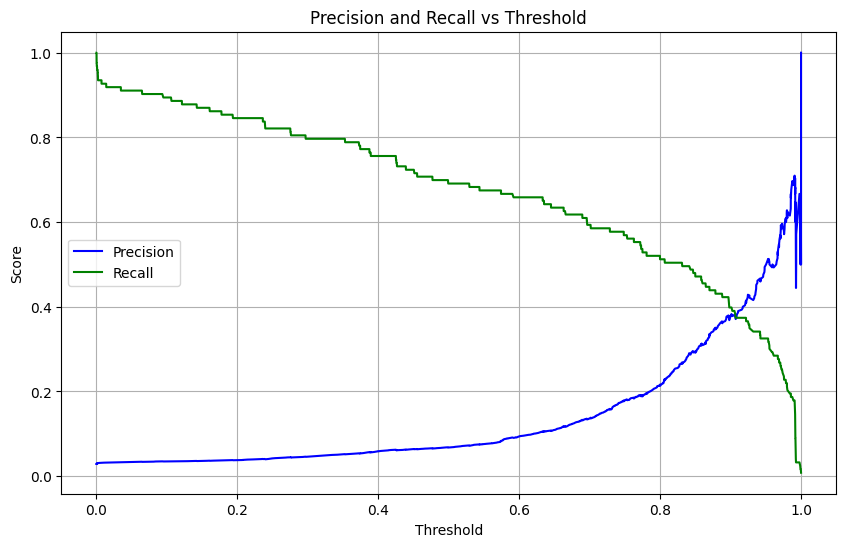

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 예측 확률
y_probs = model.predict(val_ds)  # ← val_ds는 y_true 포함되어 있어야 함
y_probs = y_probs.ravel()  # (n, 1) → (n,)

# precision, recall, threshold 계산
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 8) Evaluate and inference
# example inference on raw session
def predict_session(model, ev_list):
    cat_idx, num_vals, mask = session_to_features(ev_list)
    feed = {f: np.expand_dims(cat_idx[f], 0) for f in cat_fields}
    feed['numeric'] = np.expand_dims(num_vals, 0)
    feed['mask'] = np.expand_dims(mask, 0)
    prob = model.predict(feed)[0,0]
    return prob 

In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 30.0,
        "time_since_prev": 30.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
구매 확률: 0.6079


In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 14.0,
        "time_since_prev": 14.0
    },
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 27.0,
        "time_since_prev": 13.0
    },
    {
        "event_type": 1, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 28.0,
        "time_since_prev": 1.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
구매 확률: 0.5644


In [ ]:
example_session = [
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 0.0,
        "time_since_prev": 0.0
    },
    {
        "event_type": 2, 
        "product_id": 6902133, 
        "category_code": "computers.notebook",
        "general_category": "computers",
        "brand": "apple",
        "price": 1200.0,
        "relative_price": 0.9,
        "time_since_start": 14.0,
        "time_since_prev": 14.0
    },
    {
        "event_type": 2, 
        "product_id": 22200103, 
        "category_code": "electronics.smartphone",
        "general_category": "electronics",
        "brand": "samsung",
        "price": 350.0,
        "relative_price": 0.45,
        "time_since_start": 27.0,
        "time_since_prev": 13.0
    }
]

prob = predict_session(model, example_session)
print(f"구매 확률: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
구매 확률: 0.5509


## problems
1. StandardScaler을 학습 전체에서 fit함. -> data leakage 가능성 | 해결 
2. 모델 확장